In [ ]:
pip install gdown

In [ ]:
#download dataset from google drive
!gdown --id 1PwKJhL-_GIQ2r__khhdCrk6JKXuwST6o

Downloading...
From: https://drive.google.com/uc?id=1PwKJhL-_GIQ2r__khhdCrk6JKXuwST6o
To: /content/dataset_v6.csv
100% 156M/156M [00:00<00:00, 190MB/s]


In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install sklearn

In [ ]:
pip install jiwer

     |████████████████████████████████| 50 kB 3.2 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149855 sha256=e5e7ef9d7f1f6bed8734af8ba7110bc7e5a093bce5e776d8fb80e33bf074933f
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
# Importing libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jiwer import wer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input,Lambda
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import  Model
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [ ]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the training dataset
dataset_train = pd.read_csv('dataset_v6.csv')
print(dataset_train.shape)

(13041, 2049)


In [ ]:
dataset_train = dataset_train.iloc[:, :].values

In [ ]:
# Split the dataset into features and labels.
cleandData = pd.DataFrame(dataset_train)
images = cleandData.iloc[:, 0:2048].values
labels = cleandData.iloc[:, 2048:2049].values

print(images.shape)
print(labels.shape)

(13041, 2048)
(13041, 1)


In [ ]:
labels

array([['can you repeat that please'],
       ['can you repeat that please'],
       ['can you repeat that please'],
       ...,
       ['i am very happy'],
       ['i am very happy'],
       ['i am very happy']], dtype=object)

In [ ]:
# Extract unique words from labels.
characters = []
max_length = 0

for sentenc in labels:
  splitted_text= sentenc[0].split()
  c = 0
  for word in splitted_text:
    characters.append(word)
    c = c + 1
  if c > max_length:
    max_length = c

characters = list(set(characters))
# characters = ['null', 'your', 'hiding', 'hair', 'that', 'water', 'me', 'you', 'repeat', 'are', 'something', 'congratulations', 'please', 'free', 'i', 'help', 'bring', 'can', 'today', 'comb', 'for']
characters.insert(0, "null")
# Unique words list from the sentence
print("Unique words: ",characters)
# Number of unique word
print("Number of unique words: ",len(characters))
# Maximum length of any sentence in the dataset
print("Maximum length of any sentence in the dataset: ",max_length)

Unique words:  ['null', 'please', 'am', 'today', 'i', 'she', 'my', 'hiding', 'really', 'he', 'friend', 'happy', 'hi', 'you', 'that', 'how', 'is', 'repeat', 'can', 'something', 'appreciate', 'free', 'are', 'it', 'congratulations', 'do', 'worry', 'very', 'not', 'help']
Number of unique words:  30
Maximum length of any sentence in the dataset:  5


In [ ]:
# Define a method for converting string labels to numerical values.
def text_to_num_dictionary(list_of_list, key_col=0, val_col=1):
    value_dict = {}
    for i,value in enumerate(list_of_list):
      if i != 0:
        v = {value: str(i)}
        value_dict.update(v)
      else:
        v = {value: "null"}
        value_dict.update(v)
    return value_dict

def num_to_text_dictionary(list_of_list, key_col=0, val_col=1):
    value_dict = {}
    for i,value in enumerate(list_of_list):
      if i != 0:
        v = {str(i):value}
        value_dict.update(v)
    return value_dict

text_to_num_dict =  text_to_num_dictionary(characters)
num_to_text_dict =  num_to_text_dictionary(characters)

# printing original string
print(characters)
print("Check index at position 1 : " + num_to_text_dict['1'])


['null', 'please', 'am', 'today', 'i', 'she', 'my', 'hiding', 'really', 'he', 'friend', 'happy', 'hi', 'you', 'that', 'how', 'is', 'repeat', 'can', 'something', 'appreciate', 'free', 'are', 'it', 'congratulations', 'do', 'worry', 'very', 'not', 'help']
Check index at position 1 : please


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
print(images[0])
images = sc.fit_transform(images)
print(images[0])

[0.0 16.79267 23.245064000000003 ... 11.754963 4.6680093000000005 0.0]
[0.         0.73982057 0.62871894 ... 0.63529887 0.20789976 0.        ]


In [ ]:
# Reshape label and image data.
c=0
wordArry = []
X = []
y = []
for i in range(0,len(images)):
  c = c + 1
  wordArry.append(images[i])
  if ( c == 63 ):
    X.append(wordArry)
    y.append(labels[i])
    wordArry = []
    c = 0
print(np.asarray(X).shape)
print(np.asarray(y).shape)

(13041, 2048)
(13041, 1)
(207, 63, 2048)
(207, 1)


In [ ]:
# Convert sentence words into numbers and add padding to Y.
def convert(lst):
    return (lst[0].split())

t = []
for data in y:
  lst = convert(data)
  tt = []
  for data2 in lst:
    if data2 in text_to_num_dict:
      num_word = text_to_num_dict[data2]
      tt.append(num_word)
  t.append(tt)

t = tf.keras.preprocessing.sequence.pad_sequences(
      t, padding="post"
  )

X_train = np.asarray(X, dtype=np.float32)
y_train = np.asarray(t, dtype=np.float32)
print (y_train.shape)
print (X_train.shape)
del X
del t

(207, 5)
(207, 63, 2048)


In [ ]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
# Part 2 - Creating the model.
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = tf.keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        return y_pred

In [ ]:
# RNN
input = Input(shape=(63, 2048), name="input")
x = Bidirectional(LSTM(1024, activation='tanh',return_sequences=True, dropout=0.8, batch_size=32))(input)
x = Bidirectional(LSTM(1024, activation='tanh',return_sequences=True, dropout=0.8, batch_size=32))(x)

In [ ]:
# Output layer
cc =len(characters)
x = Dense((cc+1), activation="softmax", name="dense2")(x)

# Input layer for the CTC
labels = layers.Input(name="label", shape=( None,), dtype="float32")

# Add CTC layer for calculating CTC loss at each step
output = CTCLayer(name="ctc_loss")(labels, x)

# Define the model
model = tf.keras.models.Model(
    inputs=[input, labels], outputs=output, name="Continuous_EthSL_recognition_model"
)

# Compile the model
model.compile("adam")
model.summary()

Model: "Continuous_EthSL_recognition_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 63, 2048)]   0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 63, 2048)     25174016    ['input[0][0]']                  
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 63, 2048)    25174016    ['bidirectional[0][0]']          
 )                                                                                                
                                                                                                  
 label (InputLayer)             [(None, None)]       0           

In [ ]:
early_stopping_patience = 10000
# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)
# Train the model
history = model.fit((X_train, y_train), epochs=500, validation_split = 0.1)

Epoch 1/500
5/5 [==============================] - 16s 1s/step - loss: 79.1108 - val_loss: 48.2214
Epoch 2/500
5/5 [==============================] - 3s 707ms/step - loss: 26.1680 - val_loss: 21.7961
Epoch 3/500
5/5 [==============================] - 3s 708ms/step - loss: 18.3400 - val_loss: 17.9786
Epoch 4/500
5/5 [==============================] - 3s 706ms/step - loss: 17.0197 - val_loss: 16.7796
Epoch 5/500
5/5 [==============================] - 3s 704ms/step - loss: 15.8915 - val_loss: 16.2995
Epoch 6/500
5/5 [==============================] - 3s 706ms/step - loss: 15.2900 - val_loss: 15.3366
Epoch 7/500
5/5 [==============================] - 3s 704ms/step - loss: 14.7979 - val_loss: 15.0136
Epoch 8/500
5/5 [==============================] - 3s 710ms/step - loss: 14.4909 - val_loss: 15.0868
Epoch 9/500
5/5 [==============================] - 3s 704ms/step - loss: 14.0575 - val_loss: 14.2982
Epoch 10/500
5/5 [==============================] - 3s 706ms/step - loss: 13.7072 - val_loss:

In [ ]:
# Get the prediction model by extracting layers till the output layer
prediction_model = Model(
    model.get_layer(name="input").input, model.get_layer(name="dense2").output, name="Prediction_model"
)
prediction_model.summary()

Model: "Prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 63, 2048)]        0         
                                                                 
 bidirectional (Bidirectiona  (None, 63, 2048)         25174016  
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 63, 2048)         25174016  
 nal)                                                            
                                                                 
 dense2 (Dense)              (None, 63, 31)            63519     
                                                                 
Total params: 50,411,551
Trainable params: 50,411,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=False)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    numToChar = num_to_text(results[0])
    return numToChar

def num_to_text(list_of_string):
  numToChar=[]
  for k in  list_of_string:
    if str(int(k)) in num_to_text_dict :
        numToChar.append(num_to_text_dict[str(int(k))])
  return numToChar

avg_wer=0

# Check the results on test samples
for i in range(0,len(X_test)):
    batch_images = X_test[i]
    batch_labels = y_test[i]

    arr = np.array(batch_images)
    arr = tf.ragged.constant([arr])
    arr = arr.to_tensor()
    preds = prediction_model.predict(arr)
    pred_texts = decode_batch_predictions(preds)
    batch_labels = num_to_text(batch_labels)
    print("-------------------------------------------------------")
    print("Expected output : ",batch_labels)
    if len(batch_labels) > len(pred_texts):
        while(len(batch_labels) > len(pred_texts)):
           pred_texts.append("f")
        error = wer(batch_labels, pred_texts)
    else:
        while(len(batch_labels) < len(pred_texts)):
            batch_labels.append("f")
        error = wer(batch_labels, pred_texts)

    print("Predicted output: ",pred_texts)
    print("Word Error Rate : ",error)
    avg_wer = avg_wer + error

print("")
print("==========================================================")
print("Avarage word error rate: ",avg_wer/(len(X_test)))

-------------------------------------------------------
Expected output :  ['congratulations']
Predicted output:  ['i', 'am', 'very', 'happy']
Word Error Rate :  1.0
-------------------------------------------------------
Expected output :  ['can', 'you', 'repeat', 'that', 'please']
Predicted output:  ['can', 'you', 'repeat', 'that', 'please']
Word Error Rate :  0.0
-------------------------------------------------------
Expected output :  ['congratulations']
Predicted output:  ['i', 'am', 'worry']
Word Error Rate :  1.0
-------------------------------------------------------
Expected output :  ['i', 'really', 'appreciate', 'it']
Predicted output:  ['i', 'really', 'appreciate', 'it']
Word Error Rate :  0.0
-------------------------------------------------------
Expected output :  ['he', 'she', 'is', 'my', 'friend']
Predicted output:  ['he', 'she', 'is', 'my', 'friend']
Word Error Rate :  0.0
-------------------------------------------------------
Expected output :  ['hi', 'how', 'are',

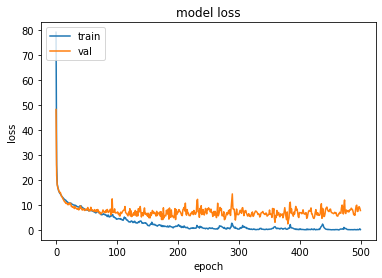

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Save trained model
prediction_model.save('prediction_model2.h5')  # creates a HDF5 file 'my_model.h5'

# prediction_model_loaded = load_model('prediction_model.h5')